In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
cellnames = ['B_cells',         
'myofibroblasts',
'fibroblasts',         
'naive_T_cells',
'gi_epithelial',         
'neuroendocrine',
'NK_cells',       
'hepatoid',              
'neutrophils',
'cd4_Tcells',     
'mast_cells',            
'parietal',
'cd8_Tcells',     
'squamous_epithelial',
'endothelial',
'monocytes_macs_DCs',   
'stromal']

In [3]:
def makeDataMat(resdict,i,j):
    dxs = ['NE', 'NS', 'M', 'D', 'T']
    res0 = resdict[str(i)+'_'+str(j)]
    # make the significance threshold
    genes_up = res0.id[(res0.baseMean > 2) & ((res0.log2FoldChange) > 1.0) & (res0.padj < 0.05)]
    genes_dn = res0.id[(res0.baseMean > 2) & ((res0.log2FoldChange) < -1.0) & (res0.padj < 0.05)]
    # now get the genes as sorted by stat
    glist_up = res0.sort_values('log2FoldChange', ascending=False).id[res0.id.isin(genes_up)].to_list() [0:10]
    glist_dn = res0.sort_values('log2FoldChange', ascending=True).id[res0.id.isin(genes_dn)].to_list() [0:10]
    # the matrix
    mat = cnto.loc[ (glist_up+glist_dn), meta.biosample[meta.dx.isin([dxs[i],dxs[j]])]] 
    # normalize the rows
    mat_std = preprocessing.normalize(mat, norm='l1', axis=1, copy=True, return_norm=False)
    # and returning it to a pandas dataframe
    data = pd.DataFrame(mat_std)
    data.columns = mat.columns
    data.index = (glist_up + glist_dn)
    yval = len(glist_up)
    
    print(dxs[i]+'_'+dxs[j])
    for gi in data.index:
        print(gi)
    print('********************************')
    
    return( (data, yval) )

In [ ]:
df = pd.DataFrame()
dxs = ['NE', 'NS', 'M', 'D', 'T']
i = 0
j = 2

for celltype in cellnames:
    print(celltype)
    cnts = pd.read_csv('../pseudobulks/pseudobulks_cluster_level/'+celltype+'_pseudobulk.csv', index_col='index')
    meta = pd.read_csv('../pseudobulks/pseudobulks_cluster_level/'+celltype+'_metadata.csv')
    cnts = cnts.drop('id', axis=1)
    sort_dict = {'NE':0,'NS':1,'M':2,'D':3,'T':4}
    meta = meta.iloc[ (meta['dx'].map(sort_dict).sort_values().index.to_list()) ]
    # reorder the counts matrix to match the metadata table
    cnto = cnts[meta.biosample]

    # first just get the model statistics
    i = 0
    j = 2
    res0 = pd.read_csv('deseq2_out/deseq2_batch_'+celltype+'_'+dxs[i]+'_'+dxs[j]+'.csv')
    res0.drop(['log2FoldChange', 'lfcSE', 'id'], axis=1, inplace=True)
    cols = res0.columns.tolist()
    cols[0] = 'gene'
    res0.columns = cols
    
    #add in the log2 fold change for each pair
    fc = res0.loc[ :, ['gene']]
    for i in range(5):
        for j in range(5):
            if i != j:
                tab0 = pd.read_csv('deseq2_out/deseq2_batch_'+celltype+'_'+dxs[i]+'_'+dxs[j]+'.csv')
                colName = 'log2FC_'+dxs[i]+'_'+dxs[j]
                res0[colName] = tab0.log2FoldChange
                fc[colName] = tab0.log2FoldChange
    
    fc.drop('gene', axis=1, inplace=True)
    maxFC = []
    for i in range(0,len(fc)):
        maxFC.append(fc.loc[i,:].abs().max())
    res0['maxFC'] = maxFC
    # then clip out the non-sig genes
    res1 = res0.loc[(res0.padj < 0.05) & (res0.maxFC > 0.58),:]
    
    #append to df
    df = df.append(res1)

# only run once!! second time disorders
#cnto.index = cnts.id

B_cells
myofibroblasts
fibroblasts
naive_T_cells
gi_epithelial
neuroendocrine
NK_cells


In [53]:
# same order as metadata
cnto.head()

,E19B,E11E,E08D,E26C,E26D,E17D,E07A,E12A,E26A,E21F,...,E23C,E24B,E08C,E11B,E11C,E19F,E17C,E08B,E24D,E12C
index,,,,,,,,,,,,,,,,,,,,,
A1BG,1728.0,56.0,53.0,435.0,1503.0,129.0,5.0,225.0,1524.0,197.0,...,199.0,48.0,366.0,27.0,22.0,825.0,5.0,58.0,146.0,40.0
A1CF,135.0,2.0,4.0,35.0,91.0,9.0,0.0,23.0,149.0,10.0,...,9.0,1.0,10.0,1.0,2.0,55.0,1.0,1.0,16.0,5.0
A2M,39105.0,1693.0,2564.0,11584.0,30157.0,3127.0,192.0,2819.0,33815.0,5420.0,...,5538.0,3569.0,12686.0,1113.0,1145.0,19251.0,274.0,821.0,5918.0,835.0
A2ML1,340.0,16.0,19.0,74.0,272.0,19.0,1.0,64.0,243.0,45.0,...,20.0,14.0,56.0,3.0,6.0,119.0,3.0,2.0,36.0,11.0
A2MP1,63.0,18.0,12.0,28.0,224.0,13.0,3.0,17.0,217.0,17.0,...,17.0,1.0,18.0,2.0,6.0,45.0,0.0,2.0,9.0,2.0


In [54]:
meta.head()

,Unnamed: 0,patient,biosample,procedure,dx,cell_counts,avg_molecules,binned_cell_counts
26,26,E19,E19B,resection,NE,5905,6303.6836,"(2048, 100000]"
52,52,E11,E11E,biopsy,NE,175,8032.2856,"(128, 512]"
2,2,E08,E08D,biopsy,NE,100,12102.8100,"(32, 128]"
49,49,E26,E26C,resection,NE,1227,9183.0080,"(512, 2048]"
48,48,E26,E26D,resection,NE,2479,12674.4390,"(2048, 100000]"


In [55]:
res1.head()

,gene,baseMean,stat,pvalue,padj,celltype,log2FC_NE_NS,log2FC_NE_M,log2FC_NE_D,log2FC_NE_T,...,log2FC_M_T,log2FC_D_NE,log2FC_D_NS,log2FC_D_M,log2FC_D_T,log2FC_T_NE,log2FC_T_NS,log2FC_T_M,log2FC_T_D,maxFC
2,A2M,2208.226421,24.202245,0.000073,0.001444,stromal,0.294702,-0.561065,-0.489461,-0.547522,...,0.013543,0.489461,0.784162,-0.071604,-0.058061,0.547522,0.842224,-0.013543,0.058061,0.855767
3,A2ML1,13.234653,17.543596,0.001515,0.014151,stromal,0.965461,1.385756,1.025724,1.037912,...,-0.347844,-1.025724,-0.060263,0.360032,0.012188,-1.037912,-0.072451,0.347844,-0.012188,1.385756
26,AARS2,15.140652,15.819505,0.003271,0.025005,stromal,0.235204,1.063127,0.435751,0.651154,...,-0.411973,-0.435751,-0.200547,0.627376,0.215403,-0.651154,-0.415951,0.411973,-0.215403,1.063127
30,AASS,96.320719,17.999367,0.001234,0.012170,stromal,-0.501951,-0.254829,-0.280716,0.310938,...,0.565767,0.280716,-0.221235,0.025887,0.591654,-0.310938,-0.812889,-0.565767,-0.591654,0.812889
43,ABCA5,53.072853,14.598950,0.005610,0.037353,stromal,0.039904,-0.329807,-0.380046,0.375269,...,0.705076,0.380046,0.419951,0.050240,0.755316,-0.375269,-0.335365,-0.705076,-0.755316,0.755316


In [56]:
df.head()

,gene,baseMean,stat,pvalue,padj,celltype,log2FC_NE_NS,log2FC_NE_M,log2FC_NE_D,log2FC_NE_T,...,log2FC_M_T,log2FC_D_NE,log2FC_D_NS,log2FC_D_M,log2FC_D_T,log2FC_T_NE,log2FC_T_NS,log2FC_T_M,log2FC_T_D,maxFC
20,AAMP,5.509905,15.497341,0.003773,0.041798,B_cells,-1.256499,-0.979313,-0.785955,-1.142375,...,-0.163062,0.785955,-0.470543,-0.193358,-0.356420,1.142375,-0.114123,0.163062,0.356420,1.256499
24,AARS1,6.068028,32.124368,0.000002,0.000220,B_cells,-0.748490,-1.700066,-0.837207,-2.100906,...,-0.400840,0.837207,0.088717,-0.862859,-1.263700,2.100906,1.352416,0.400840,1.263700,2.100906
59,ABCB9,3.847648,15.343509,0.004039,0.043689,B_cells,-1.308940,-0.340720,0.142739,-0.925327,...,-0.584607,-0.142739,-1.451680,-0.483459,-1.068066,0.925327,-0.383614,0.584607,1.068066,1.451680
67,ABCC4,1.588472,17.350588,0.001652,0.024050,B_cells,3.089127,0.574245,0.705436,-0.507569,...,-1.081814,-0.705436,2.383691,-0.131191,-1.213005,0.507569,3.596696,1.081814,1.213005,3.596696
285,ACTN4,12.133443,23.316447,0.000109,0.003663,B_cells,0.745873,-0.806113,-0.345555,-1.098557,...,-0.292444,0.345555,1.091428,-0.460558,-0.753002,1.098557,1.844430,0.292444,0.753002,1.844430


In [70]:
df = df[ ['celltype', 'gene', 'baseMean', 'stat', 'pvalue', 'padj', 'maxFC',
       'log2FC_NE_NS', 'log2FC_NE_M', 'log2FC_NE_D', 'log2FC_NE_T',
       'log2FC_NS_NE', 'log2FC_NS_M', 'log2FC_NS_D', 'log2FC_NS_T',
       'log2FC_M_NE', 'log2FC_M_NS', 'log2FC_M_D', 'log2FC_M_T', 'log2FC_D_NE',
       'log2FC_D_NS', 'log2FC_D_M', 'log2FC_D_T', 'log2FC_T_NE', 'log2FC_T_NS',
       'log2FC_T_M', 'log2FC_T_D'] ]

In [71]:
df.shape

(18261, 27)

In [72]:
df.head()

,celltype,gene,baseMean,stat,pvalue,padj,maxFC,log2FC_NE_NS,log2FC_NE_M,log2FC_NE_D,...,log2FC_M_D,log2FC_M_T,log2FC_D_NE,log2FC_D_NS,log2FC_D_M,log2FC_D_T,log2FC_T_NE,log2FC_T_NS,log2FC_T_M,log2FC_T_D
20,B_cells,AAMP,5.509905,15.497341,0.003773,0.041798,1.256499,-1.256499,-0.979313,-0.785955,...,0.193358,-0.163062,0.785955,-0.470543,-0.193358,-0.356420,1.142375,-0.114123,0.163062,0.356420
24,B_cells,AARS1,6.068028,32.124368,0.000002,0.000220,2.100906,-0.748490,-1.700066,-0.837207,...,0.862859,-0.400840,0.837207,0.088717,-0.862859,-1.263700,2.100906,1.352416,0.400840,1.263700
59,B_cells,ABCB9,3.847648,15.343509,0.004039,0.043689,1.451680,-1.308940,-0.340720,0.142739,...,0.483459,-0.584607,-0.142739,-1.451680,-0.483459,-1.068066,0.925327,-0.383614,0.584607,1.068066
67,B_cells,ABCC4,1.588472,17.350588,0.001652,0.024050,3.596696,3.089127,0.574245,0.705436,...,0.131191,-1.081814,-0.705436,2.383691,-0.131191,-1.213005,0.507569,3.596696,1.081814,1.213005
285,B_cells,ACTN4,12.133443,23.316447,0.000109,0.003663,1.844430,0.745873,-0.806113,-0.345555,...,0.460558,-0.292444,0.345555,1.091428,-0.460558,-0.753002,1.098557,1.844430,0.292444,0.753002


In [73]:
df.to_csv('EsoAtlas_DEGs_filtered_5_16_22.csv')

<AxesSubplot:xlabel='CellCounts', ylabel='SeqDepth'>

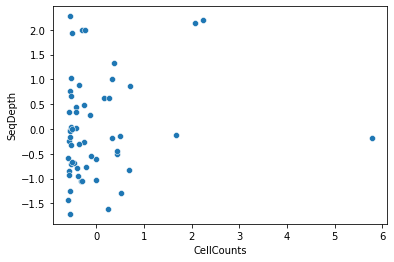

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x =  scaler.fit_transform(meta[ ['cell_counts', 'avg_molecules'] ])
plotdf = pd.DataFrame(x, columns=['CellCounts','SeqDepth'])
sns.scatterplot(data=plotdf, x='CellCounts', y='SeqDepth')